<a href="https://colab.research.google.com/github/vir-k01/CH5650/blob/main/CH5650_CNN_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifying crystal structures using 2D Diffraction Fingerpirnts and CNN
-Authored by Vir Karan

### Loading the required packages and dataset

In [2]:
!pip install keract
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import pickle
from keract import get_activations
from keract import display_activations
np.random.seed(42)

I'm loading the dataset from my google drive, hence the below cell. Data can be downloaded from:

Pristine dataset (Diffraction fingerprints of crystals): https://dataverse.harvard.edu/api/access/datafile/3238702?format=original

Pristine dataset (Labels of crystals): https://dataverse.harvard.edu/api/access/datafile/3238704?format=original

Dataset info: https://dataverse.harvard.edu/api/access/datafile/3238706?format=original

Defected dataset (Diffraction fingerprints of defected crystals): https://dataverse.harvard.edu/api/access/datafile/3238702?format=original

Defected dataset (Labels of defected crystals): https://dataverse.harvard.edu/api/access/datafile/3238704?format=original

Dataset is in the form of pickled files, have to open them and convert to numpy arrays.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
X = pickle.load(open('/content/drive/MyDrive/Acads/CH5650/pristine_dataset_x.pkl', 'rb'), encoding='latin1')
y = pickle.load(open('/content/drive/MyDrive/Acads/CH5650/pristine_dataset_y.pkl', 'rb'), encoding='latin1')
X_val = pickle.load(open('/content/drive/MyDrive/Acads/CH5650/pristine_dataset_x_val.pkl', 'rb'), encoding='latin1')
y_val = pickle.load(open('/content/drive/MyDrive/Acads/CH5650/pristine_dataset_y_val.pkl', 'rb'), encoding='latin1')

Mounted at /content/drive


Have to convert labels to categorical (one-hot encoding) for feeding to CNN model next.

In [4]:
y_train = to_categorical(y)
y_val_cat = to_categorical(y_val)

### Building and training the CNN model

We now build and compile the model with the hyperparamters mentioned in the reference paper and start training.

In [5]:
model = tf.keras.Sequential()
model.add(Input(shape=(64, 64, 3)))
model.add(Convolution2D(filters=32, kernel_size=(7, 7), padding='same'))
model.add(Convolution2D(filters=32, kernel_size=(7, 7), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(filters=8, kernel_size=(7, 7), padding='same'))
model.add(Convolution2D(filters=8, kernel_size=(7, 7), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        50208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        25104     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        12560     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                    

In [6]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.99, decay=0)
METRICS = [
      #tf.keras.metrics.TruePositives(name='tp'),
      #tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      #tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=METRICS)
hist = model.fit(X, y_train, epochs=5, batch_size=32, validation_split=0.05, validation_data=(X_val, y_val_cat), shuffle=True)
model.save('trained.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
313/313 [==============================] - 30s 59ms/step - loss: 0.0190 - accuracy: 0.9988 - auc: 0.9998 - val_loss: 9.2268e-05 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 2/5
313/313 [==============================] - 18s 56ms/step - loss: 0.0040 - accuracy: 0.9997 - auc: 0.9999 - val_loss: 1.2442e-07 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 3/5
313/313 [==============================] - 17s 56ms/step - loss: 0.0026 - accuracy: 0.9998 - auc: 1.0000 - val_loss: 1.6648e-06 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 4/5
313/313 [==============================] - 17s 56ms/step - loss: 0.0011 - accuracy: 0.9999 - auc: 1.0000 - val_loss: 4.3015e-07 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 5/5
313/313 [==============================] - 17s 55ms/step - loss: 1.0870e-04 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 3.5876e-07 - val_accuracy: 1.0000 - val_auc: 1.0000


The loss curves from the training process can then be plotted. 

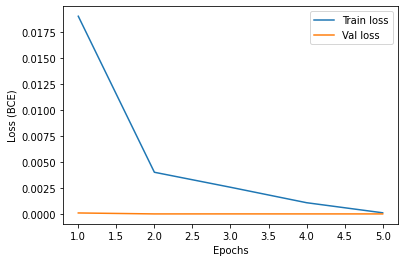

In [10]:
plt.plot(np.linspace(1, 5, 5), hist.history['loss'], label='Train loss')
plt.plot(np.linspace(1, 5, 5), hist.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (BCE)')
plt.legend()
plt.show()

Evaluate the trained model by finding the confusion matrix.

In [8]:
pred_val = model.predict(X_val)
labels_val = np.argmax(pred_val, axis=1)
confusion_matrix(y, labels_val)

array([[2601,    0,    0,    0,    0,    0,    0],
       [   1,  220,    0,    0,    0,    0,    0],
       [   0,    0,  842,    0,    0,    0,    0],
       [   0,    0,    0,  910,    0,    0,    0],
       [   0,    0,    0,    0, 2761,    0,    0],
       [   0,    0,    0,    0,    0, 3178,    0],
       [   0,    0,    0,    0,    0,    0,    4]])

Finally, using the keract library, compute and visualize the activation maps. (Result omitted due to large size)

In [ ]:
activations = get_activations(model, X[500].reshape(1, 64, 64, 3))
display_activations(activations, save=False, cmap='gray')